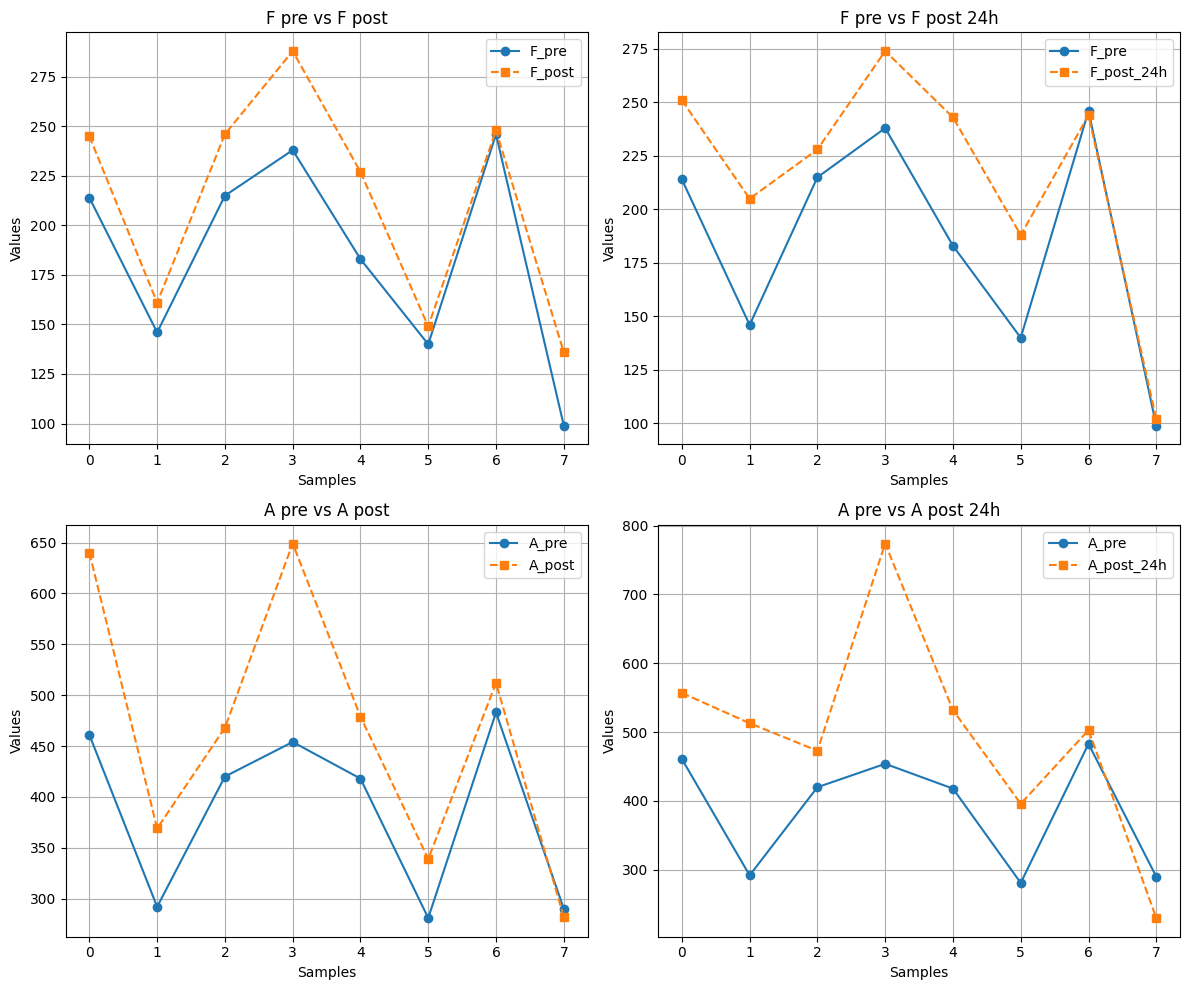

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# خواندن داده‌ها
file_path = r"C:\Users\asadi\Desktop\Pablo_statistics\Resultados_csv.csv"
data = pd.read_csv(file_path)

# تغییر نام ستون‌ها برای خوانایی بهتر
data.columns = ["Paciente", "F_pre", "F_post", "F_post_24h", "A_pre", "A_post", "A_post_24h", "Altura", "Peso", "Edad"]

# لیست مقایسه‌ها
comparisons = [("F_pre", "F_post", "F pre vs F post"),
               ("F_pre", "F_post_24h", "F pre vs F post 24h"),
               ("A_pre", "A_post", "A pre vs A post"),
               ("A_pre", "A_post_24h", "A pre vs A post 24h")]

# ایجاد نمودارها
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for (col1, col2, title), ax in zip(comparisons, axes.flatten()):
    ax.plot(data.index, data[col1], marker="o", linestyle="-", label=col1)
    ax.plot(data.index, data[col2], marker="s", linestyle="--", label=col2)
    ax.set_title(title)
    ax.set_xlabel("Samples")
    ax.set_ylabel("Values")
    ax.legend()
    ax.grid(True)

# نمایش نمودارها
plt.tight_layout()
plt.savefig("Statistics_Pablo_iss.png")
plt.show()

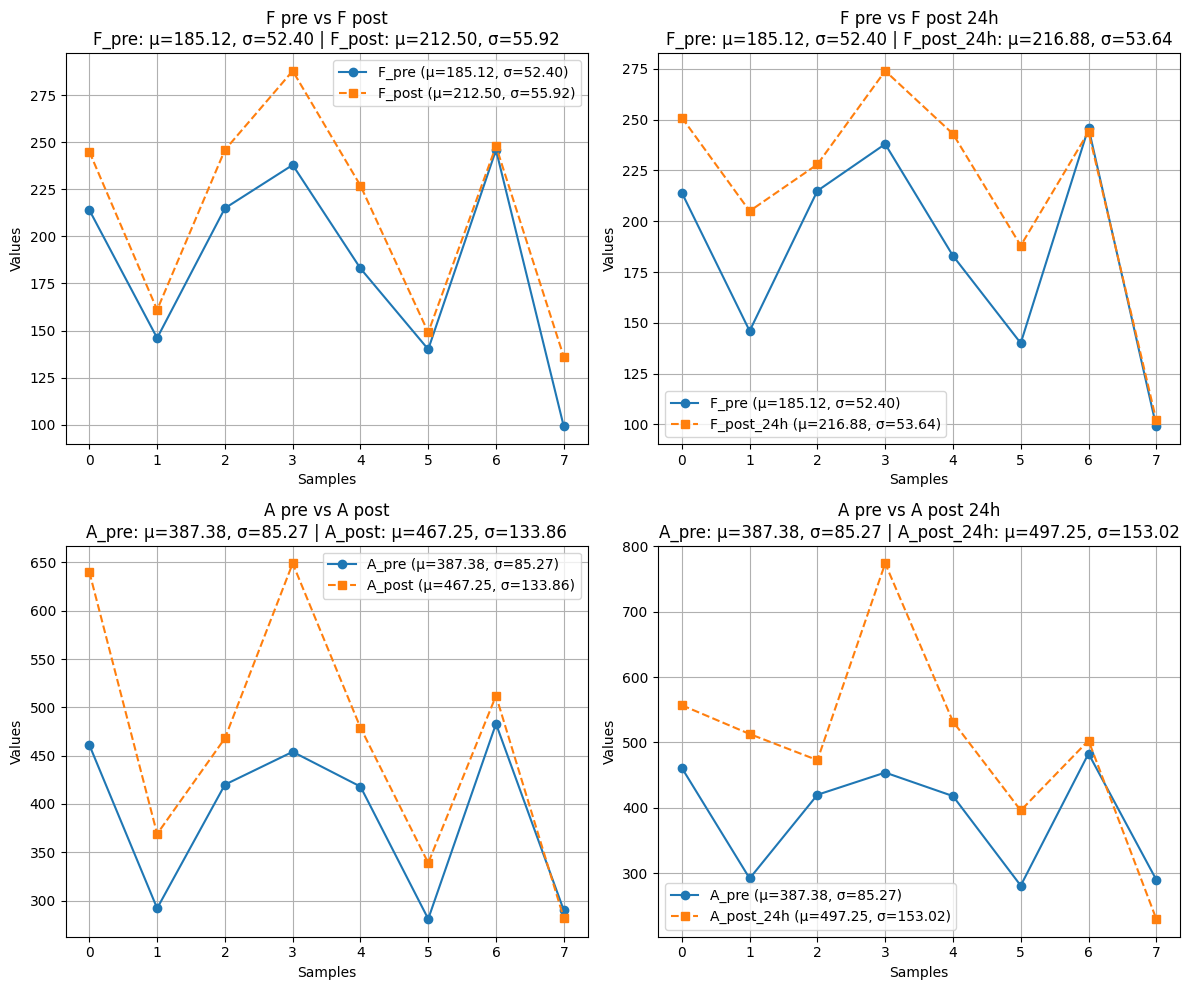

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# خواندن داده‌ها
file_path = r"C:\Users\asadi\Desktop\Pablo_statistics\Resultados_csv.csv"
data = pd.read_csv(file_path)

# تغییر نام ستون‌ها برای خوانایی بهتر
data.columns = ["Paciente", "F_pre", "F_post", "F_post_24h", "A_pre", "A_post", "A_post_24h", "Altura", "Peso", "Edad"]

# محاسبه میانگین و انحراف معیار هر ستون
stats = data.describe().loc[["mean", "std"]]

# لیست مقایسه‌ها
comparisons = [
    ("F_pre", "F_post", "F pre vs F post"),
    ("F_pre", "F_post_24h", "F pre vs F post 24h"),
    ("A_pre", "A_post", "A pre vs A post"),
    ("A_pre", "A_post_24h", "A pre vs A post 24h")
]

# ایجاد نمودارها
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for (col1, col2, title), ax in zip(comparisons, axes.flatten()):
    # محاسبه میانگین و انحراف معیار
    mean1, std1 = stats[col1]["mean"], stats[col1]["std"]
    mean2, std2 = stats[col2]["mean"], stats[col2]["std"]
    
    # رسم خطوط
    ax.plot(data.index, data[col1], marker="o", linestyle="-", label=f"{col1} (μ={mean1:.2f}, σ={std1:.2f})")
    ax.plot(data.index, data[col2], marker="s", linestyle="--", label=f"{col2} (μ={mean2:.2f}, σ={std2:.2f})")

    # عنوان شامل میانگین و انحراف معیار
    ax.set_title(f"{title}\n{col1}: μ={mean1:.2f}, σ={std1:.2f} | {col2}: μ={mean2:.2f}, σ={std2:.2f}")

    ax.set_xlabel("Samples")
    ax.set_ylabel("Values")
    ax.legend()
    ax.grid(True)

# نمایش نمودارها
plt.tight_layout()
plt.show()


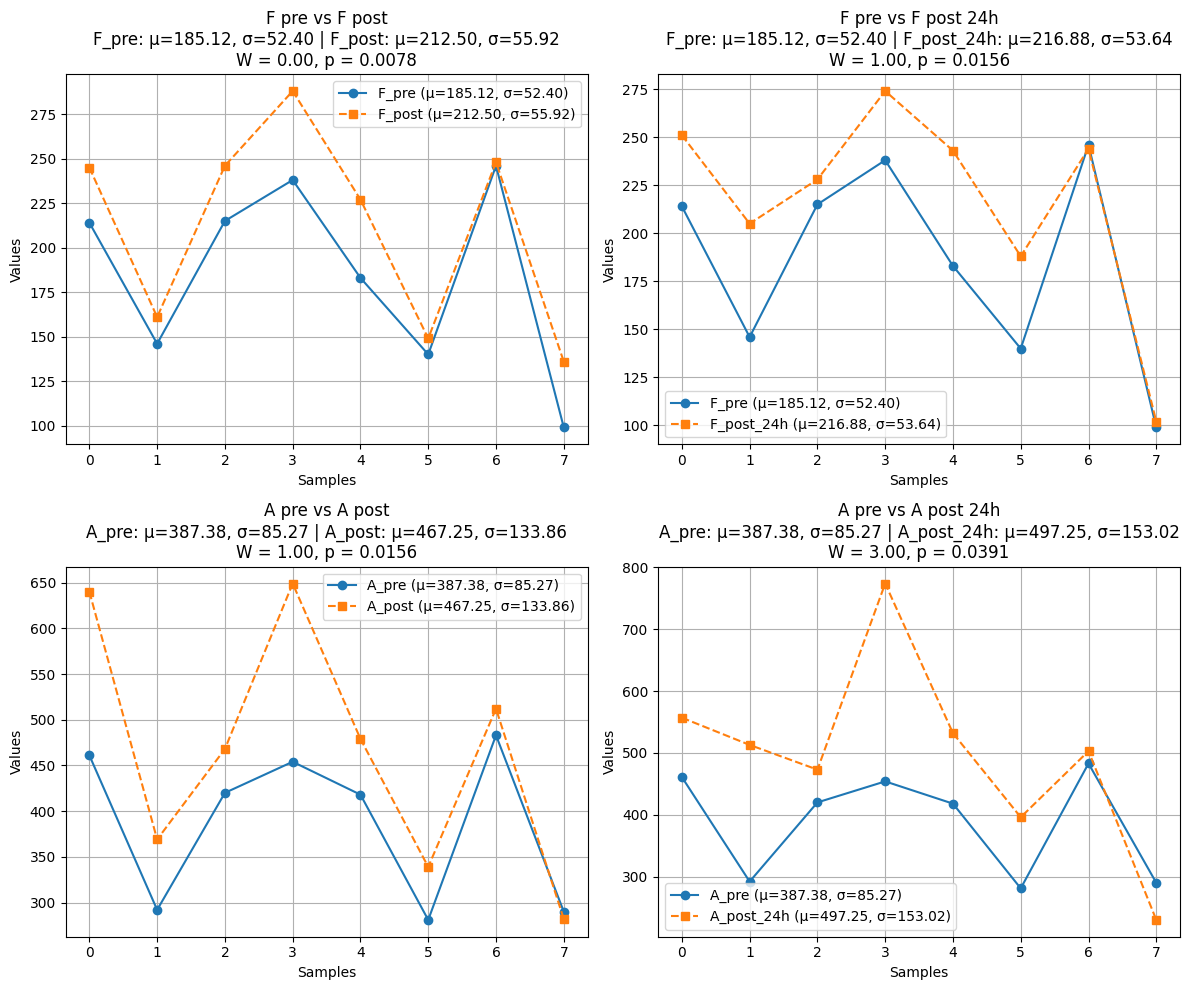

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# خواندن داده‌ها
file_path = r"C:\Users\asadi\Desktop\Pablo_statistics\Resultados_csv.csv"
data = pd.read_csv(file_path)

# تغییر نام ستون‌ها برای خوانایی بهتر
data.columns = ["Paciente", "F_pre", "F_post", "F_post_24h", "A_pre", "A_post", "A_post_24h", "Altura", "Peso", "Edad"]

# محاسبه میانگین و انحراف معیار هر ستون
stats = data.describe().loc[["mean", "std"]]

# لیست مقایسه‌ها
comparisons = [
    ("F_pre", "F_post", "F pre vs F post"),
    ("F_pre", "F_post_24h", "F pre vs F post 24h"),
    ("A_pre", "A_post", "A pre vs A post"),
    ("A_pre", "A_post_24h", "A pre vs A post 24h")
]

# ایجاد نمودارها
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for (col1, col2, title), ax in zip(comparisons, axes.flatten()):
    # محاسبه میانگین و انحراف معیار
    mean1, std1 = stats[col1]["mean"], stats[col1]["std"]
    mean2, std2 = stats[col2]["mean"], stats[col2]["std"]
    
    # اجرای تست ویلکاکسون
    w_stat, p_value = wilcoxon(data[col1], data[col2])

    # رسم خطوط
    ax.plot(data.index, data[col1], marker="o", linestyle="-", label=f"{col1} (μ={mean1:.2f}, σ={std1:.2f})")
    ax.plot(data.index, data[col2], marker="s", linestyle="--", label=f"{col2} (μ={mean2:.2f}, σ={std2:.2f})")

    # عنوان شامل میانگین، انحراف معیار، مقدار W و مقدار p-value
    ax.set_title(f"{title}\n{col1}: μ={mean1:.2f}, σ={std1:.2f} | {col2}: μ={mean2:.2f}, σ={std2:.2f}\n"
                 f"W = {w_stat:.2f}, p = {p_value:.4f}")

    ax.set_xlabel("Samples")
    ax.set_ylabel("Values")
    ax.legend()
    ax.grid(True)

# نمایش نمودارها
plt.tight_layout()
plt.show()


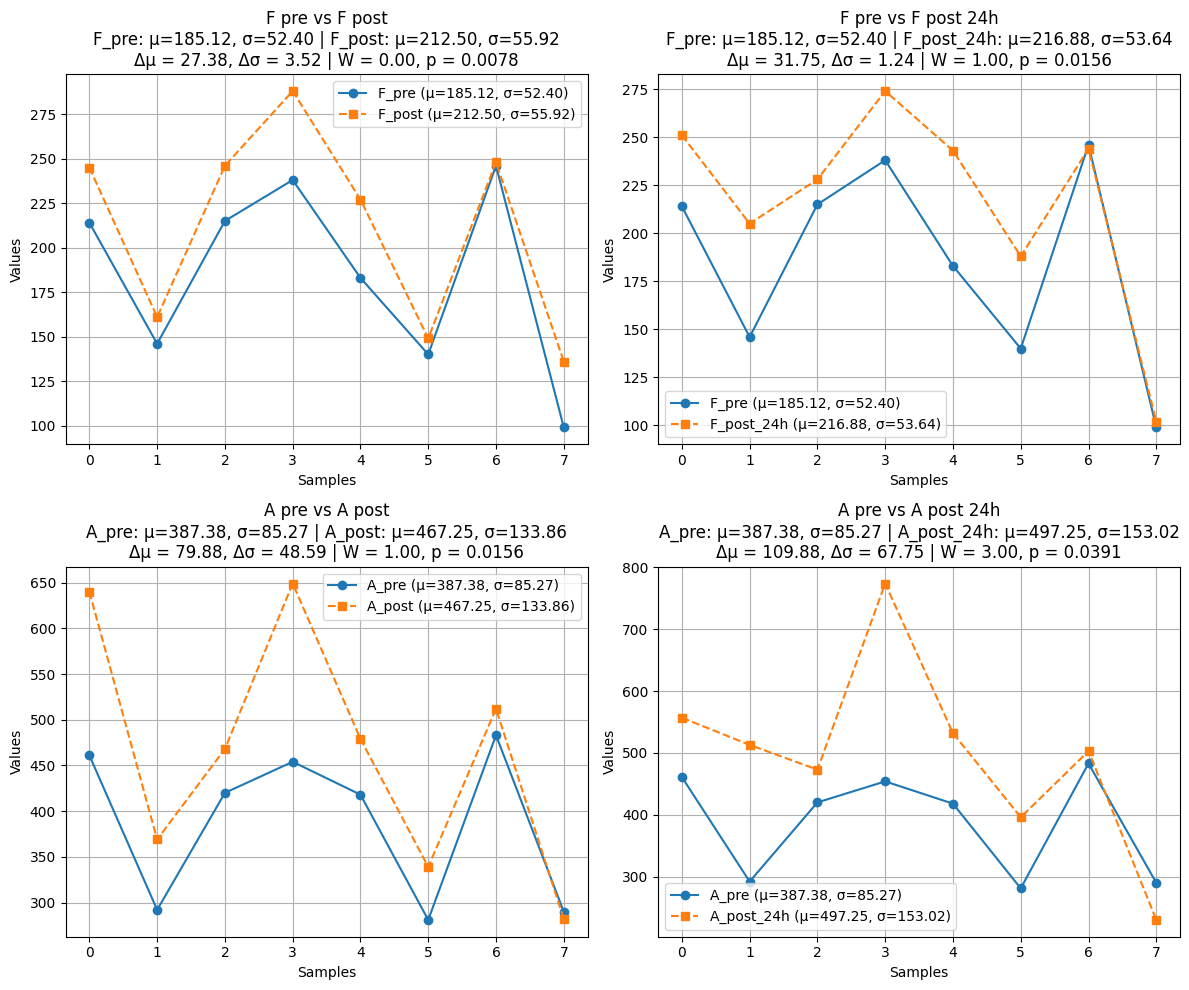

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# خواندن داده‌ها
file_path = r"C:\Users\asadi\Desktop\Pablo_statistics\Resultados_csv.csv"
data = pd.read_csv(file_path)

# تغییر نام ستون‌ها برای خوانایی بهتر
data.columns = ["Paciente", "F_pre", "F_post", "F_post_24h", "A_pre", "A_post", "A_post_24h", "Altura", "Peso", "Edad"]

# محاسبه میانگین و انحراف معیار هر ستون
stats = data.describe().loc[["mean", "std"]]

# لیست مقایسه‌ها
comparisons = [
    ("F_pre", "F_post", "F pre vs F post"),
    ("F_pre", "F_post_24h", "F pre vs F post 24h"),
    ("A_pre", "A_post", "A pre vs A post"),
    ("A_pre", "A_post_24h", "A pre vs A post 24h")
]

# ایجاد نمودارها
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for (col1, col2, title), ax in zip(comparisons, axes.flatten()):
    # محاسبه میانگین و انحراف معیار
    mean1, std1 = stats[col1]["mean"], stats[col1]["std"]
    mean2, std2 = stats[col2]["mean"], stats[col2]["std"]
    
    # محاسبه اختلاف میانگین و اختلاف انحراف معیار
    mean_diff = mean2 - mean1
    std_diff = std2 - std1

    # اجرای تست ویلکاکسون
    w_stat, p_value = wilcoxon(data[col1], data[col2])

    # رسم خطوط
    ax.plot(data.index, data[col1], marker="o", linestyle="-", label=f"{col1} (μ={mean1:.2f}, σ={std1:.2f})")
    ax.plot(data.index, data[col2], marker="s", linestyle="--", label=f"{col2} (μ={mean2:.2f}, σ={std2:.2f})")

    # عنوان شامل میانگین، انحراف معیار، مقدار W، مقدار p-value، اختلاف میانگین و اختلاف انحراف معیار
    ax.set_title(f"{title}\n"
                 f"{col1}: μ={mean1:.2f}, σ={std1:.2f} | {col2}: μ={mean2:.2f}, σ={std2:.2f}\n"
                 f"Δμ = {mean_diff:.2f}, Δσ = {std_diff:.2f} | W = {w_stat:.2f}, p = {p_value:.4f}")

    ax.set_xlabel("Samples")
    ax.set_ylabel("Values")
    ax.legend()
    ax.grid(True)

# نمایش نمودارها
plt.tight_layout()
plt.savefig("Statistics_Pablo_iss.png")
plt.show()
